Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and student id below:

In [47]:
NAME = "Tunlaton Wongchai"
STUDENT_ID = "63070224"

---

# 1 Perceptron - OR Gate

In [48]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
from numpy.random import RandomState

### 1.1 Define input [[0, 0], [0, 1], [1, 0], [1, 1]] as X and [0, 1, 1, 1] as y.

In [109]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1]).reshape(-1, 1)

### 1.2 Write a Perceptron function in the following format:

$$
[\theta, J_{History}] = perceptron(X, y, \theta, \alpha, n_{iteration})
$$

where $\theta$ is a weight vector, $\alpha$ is a learning rate, $n_{iteration}$ is a number of iteration, and $J_{History}$is a cost function vector.

In [50]:
def create_theta(X):
    theta = np.zeros((X.shape[1] + 1, 1))
    return theta

def add_bias(X):
    bias_array = np.ones((X.shape[0], 1))
    X = np.hstack((bias_array, X))
    return X

def step_function(X):
    return (X >= 0).astype(np.int64)
    
def predict(X, theta):
    y_pred = np.dot(X, theta)
    return step_function(y_pred)

def perceptron(X, y, theta0, alpha, n_iteration):
    theta = np.copy(theta0)

    for _ in range(n_iteration):
        y_pred = predict(X, theta)
        error = y - y_pred
        theta =  theta + alpha * np.dot(X.T, error)

        return theta

### 1.3 Write a function to plot a decision boundary and embed this function in the Perceptron function written in Question 2.

In [51]:
def plot_decision_boundary(X, y, theta):
    # YOUR CODE HERE
    raise NotImplementedError()

### 1.4 Run the Perceptron classifier with α = 1 and n_iteration = 100 on the data.

In [113]:
alpha = 1
n_iteration = 100
theta0 = create_theta(X)

theta = perceptron(add_bias(X), y, theta0, alpha, n_iteration)
y_pred = predict(add_bias(X), theta)

In [ ]:
y = w0 + x1w1 + x2w2

C:\Users\LAB203-01\AppData\Local\Temp\ipykernel_14332\127535803.py:4: RuntimeWarning: divide by zero encountered in true_divide
  boundary_x2 = (theta[0, 0] + np.dot(theta[1, 0], boundary_x1)) / theta[2, 0]


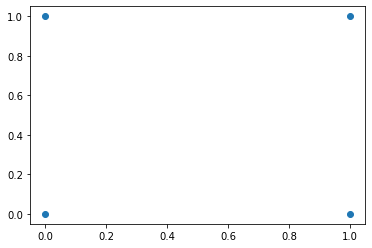

In [117]:
plt.scatter(X[:, 0], X[:, 1])

boundary_x1 = [np.min(X[:, 0] - 5), np.max(X[:, 1] + 5)]
boundary_x2 = theta[0, 0] + np.dot(theta[1, 0], boundary_x1)) / theta[2, 0]
plt.plot(boundary_x1, boundary_x2, label='Decision Boundary', color='red')


### 1.5 Observe the classifier weight and bias.
In addition, observe how the decision boundary acts with the data.


In [53]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# 2 Perceptron - XOR Gate

### 2.1 Define input [[0, 0], [0, 1], [1, 0], [1, 1]] as X and [0, 1, 1, 0] as y.

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

### 2.2 Run the Perceptron classifier with α = 1 and n_iteration = 100 on the data.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### 2.3 Observe the classifier weight and bias. In addition, observe how the decision boundary acts with the data and discuss the results.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

# 3 Perceptron - Iris

### 3.1 Load the Iris dataset from sklearn library

In [54]:
iris = sklearn.datasets.load_iris()
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 3.2 Define Sepal Length (cm), Sepal Width (cm), as X and Label—0 (Setosa), 1 (Versicolor)— as y

In [55]:
data_idx = np.where(np.logical_or(iris['target'] == 0,iris['target']==1))[0]

# X = Sepal Length (cm), Sepal Width (cm)
X = iris['data'][data_idx, :2]

# y = Setosa, Versicolor
y = iris['target'][data_idx].reshape(-1, 1)

### 3.3 Write a function to randomly split the dataset to be training and test sets:

$$
[X_{train}, y_{train}, X_{test}, y_{test}] = splitData(X, y, Percentage_{train}, n_{Seed}),
$$

where $Percentage_{Train}$ is the percentage of training sample split from the dataset, and $n_{Seed}$ is a random generator number.

In [56]:
def splitData(X, y, percentage_train, n_seed):
    random  = np.random.RandomState(seed=n_seed)
    indexes = np.arange(X.shape[0])
    random.shuffle(indexes)

    X_temp = X[indexes].copy()
    y_temp = y[indexes].copy()

    n_train = int(percentage_train * X_temp.shape[0])

    X_train = X_temp[:n_train, :]
    y_train = y_temp[:n_train]

    X_test = X_temp[n_train:, :]
    y_test = y_temp[n_train:]

    return X_train, y_train, X_test, y_test

### 3.4 Write a function to normalise X_train to [0, 1]:
$$
[X_{train\_norm}, X_{max}, X_{min}] = normaliseTrain(X)
$$

In [57]:
def normaliseTrain(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)

    X_train_norm = (X - X_min) / (X_max - X_min)

    return X_train_norm, X_max, X_min

### 3.5 Write a function to normalise X_test to the same space as the training set:

$$
X_{test\_norm} = normaliseTest(X_{test}, X_{max}, X_{min})
$$

In [58]:
def normaliseTest(X_test, X_max, X_min):    
    X_test_norm = (X_test- X_min) / (X_max - X_min) 
    
    return X_test_norm

### 3.6 Write a function to calculate accuracy of y_predict:

$$
accuracy = calculateAccuracy(y_{predict}, y_{test})
$$

In [59]:
def calculate_accuracy(y_predict, y_test):
    correct = np.sum(y_predict == y_test)
    acc = correct*100/y_predict.shape[0]
    
    return acc

### 3.7 Split the dataset to 70 % training set and 30 % test set. Train Perceptron classifier with with α = 1 and niteration = 100 on the dataset. Calculate and observe the accuracy of the task.

In [60]:
X_train, y_train, X_test, y_test = splitData(X, y, percentage_train=0.7, n_seed=10)

In [105]:
alpha = 1
n_iteration = 100
theta0 = create_theta(X)

theta = perceptron(add_bias(X_train), y_train, theta0, alpha, n_iteration)
theta

array([[ -34. ],
       [-170.2],
       [-117. ]])

In [108]:
y_pred = predict(add_bias(X_test), theta)
acc = calculate_accuracy(y_pred, y_test)
print(acc)

53.333333333333336


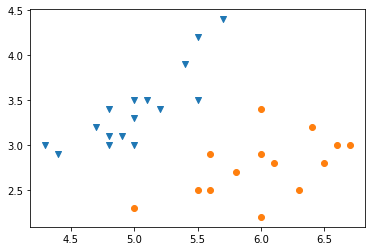

In [104]:
plt.scatter(X_test[:, 0].reshape(-1,1)[y_test==0], X_test[:, 1].reshape(-1,1)[y_test==0], marker="v", label='not sentosa')
plt.scatter(X_test[:, 0].reshape(-1,1)[y_test==1], X_test[:, 1].reshape(-1,1)[y_test==1], marker="o", label='sentosa')



### 3.8 Observe the classifier weight and bias. In addition, observe how the decision boundary acts with the data and discuss the results.

In [63]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 